<a href="https://colab.research.google.com/github/novita824/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accesing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## Citra Channel

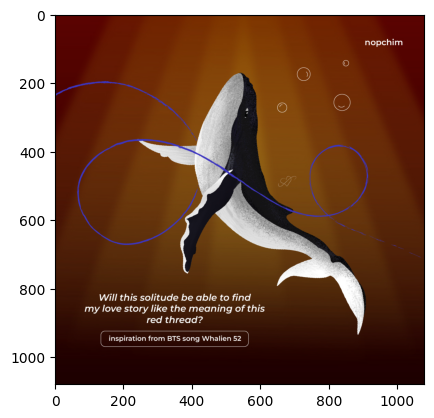

In [6]:
img = cv.imread('/content/drive/MyDrive/whalien.jpg')
plt.imshow(img)

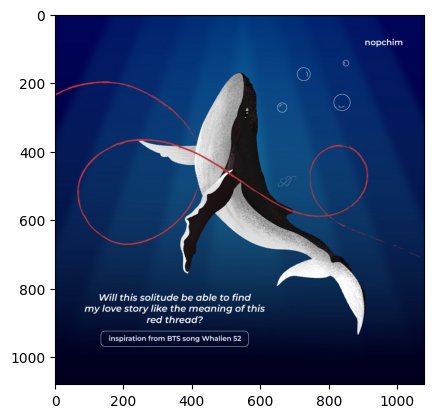

In [7]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)   #konversi channel BGR -> RGB
plt.imshow(img3)

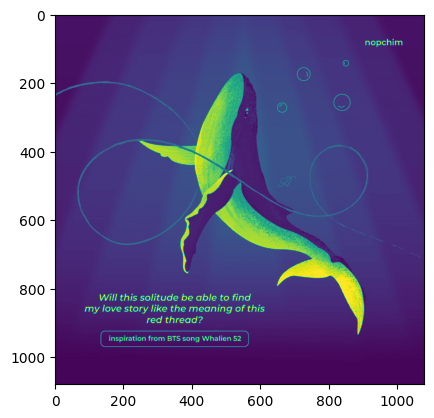

In [8]:
img_gray = cv.imread('/content/drive/MyDrive/whalien.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

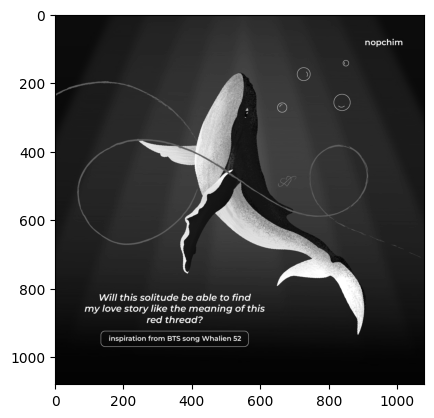

In [9]:
plt.imshow(img_gray, cmap='gray')

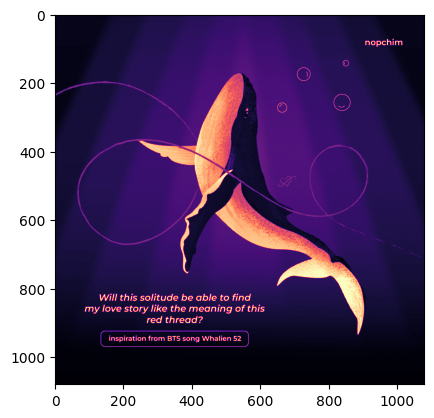

In [10]:
plt.imshow(img_gray, cmap='magma')

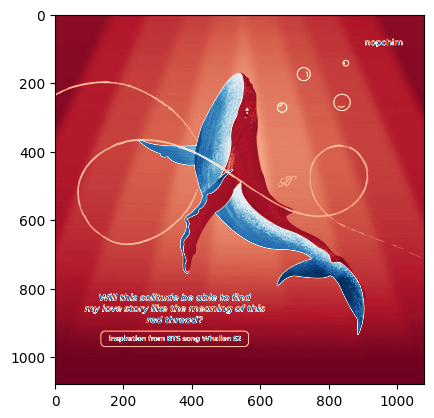

In [11]:
plt.imshow(img_gray, cmap='RdBu')

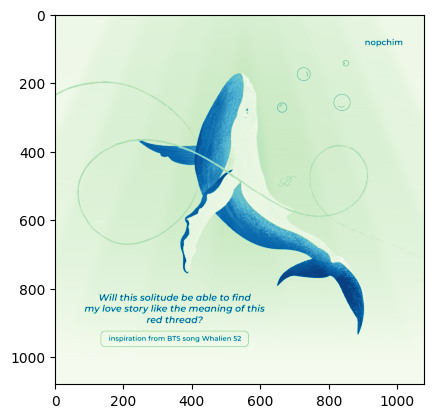

In [12]:
plt.imshow(img_gray, cmap='GnBu')

resolusi image: tinggi x lebar =  1080  x  1080


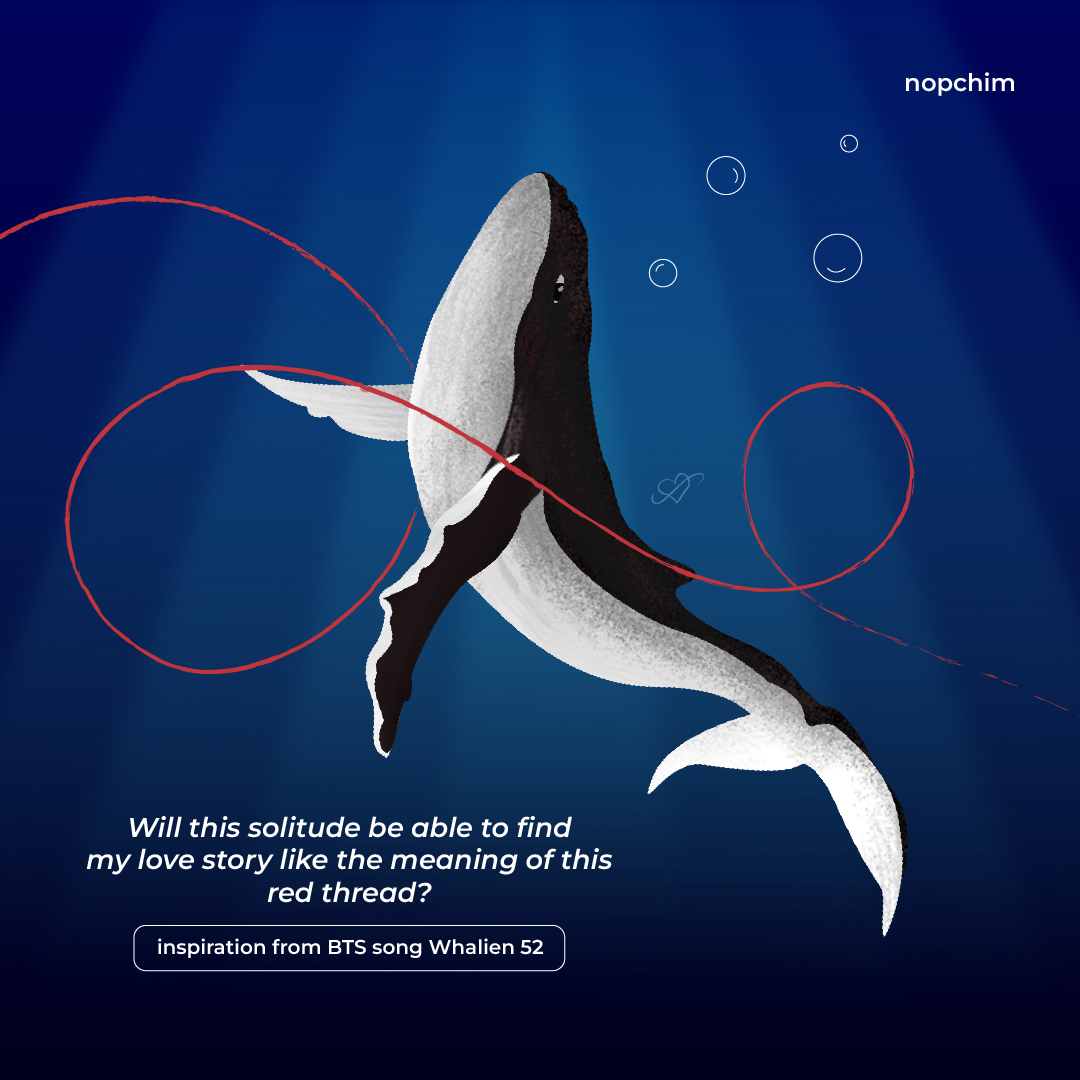

In [21]:
tinggi = img.shape[0]
lebar = img.shape[1]
print("resolusi image: tinggi x lebar = ",tinggi," x ",lebar)
cv2_imshow(img)

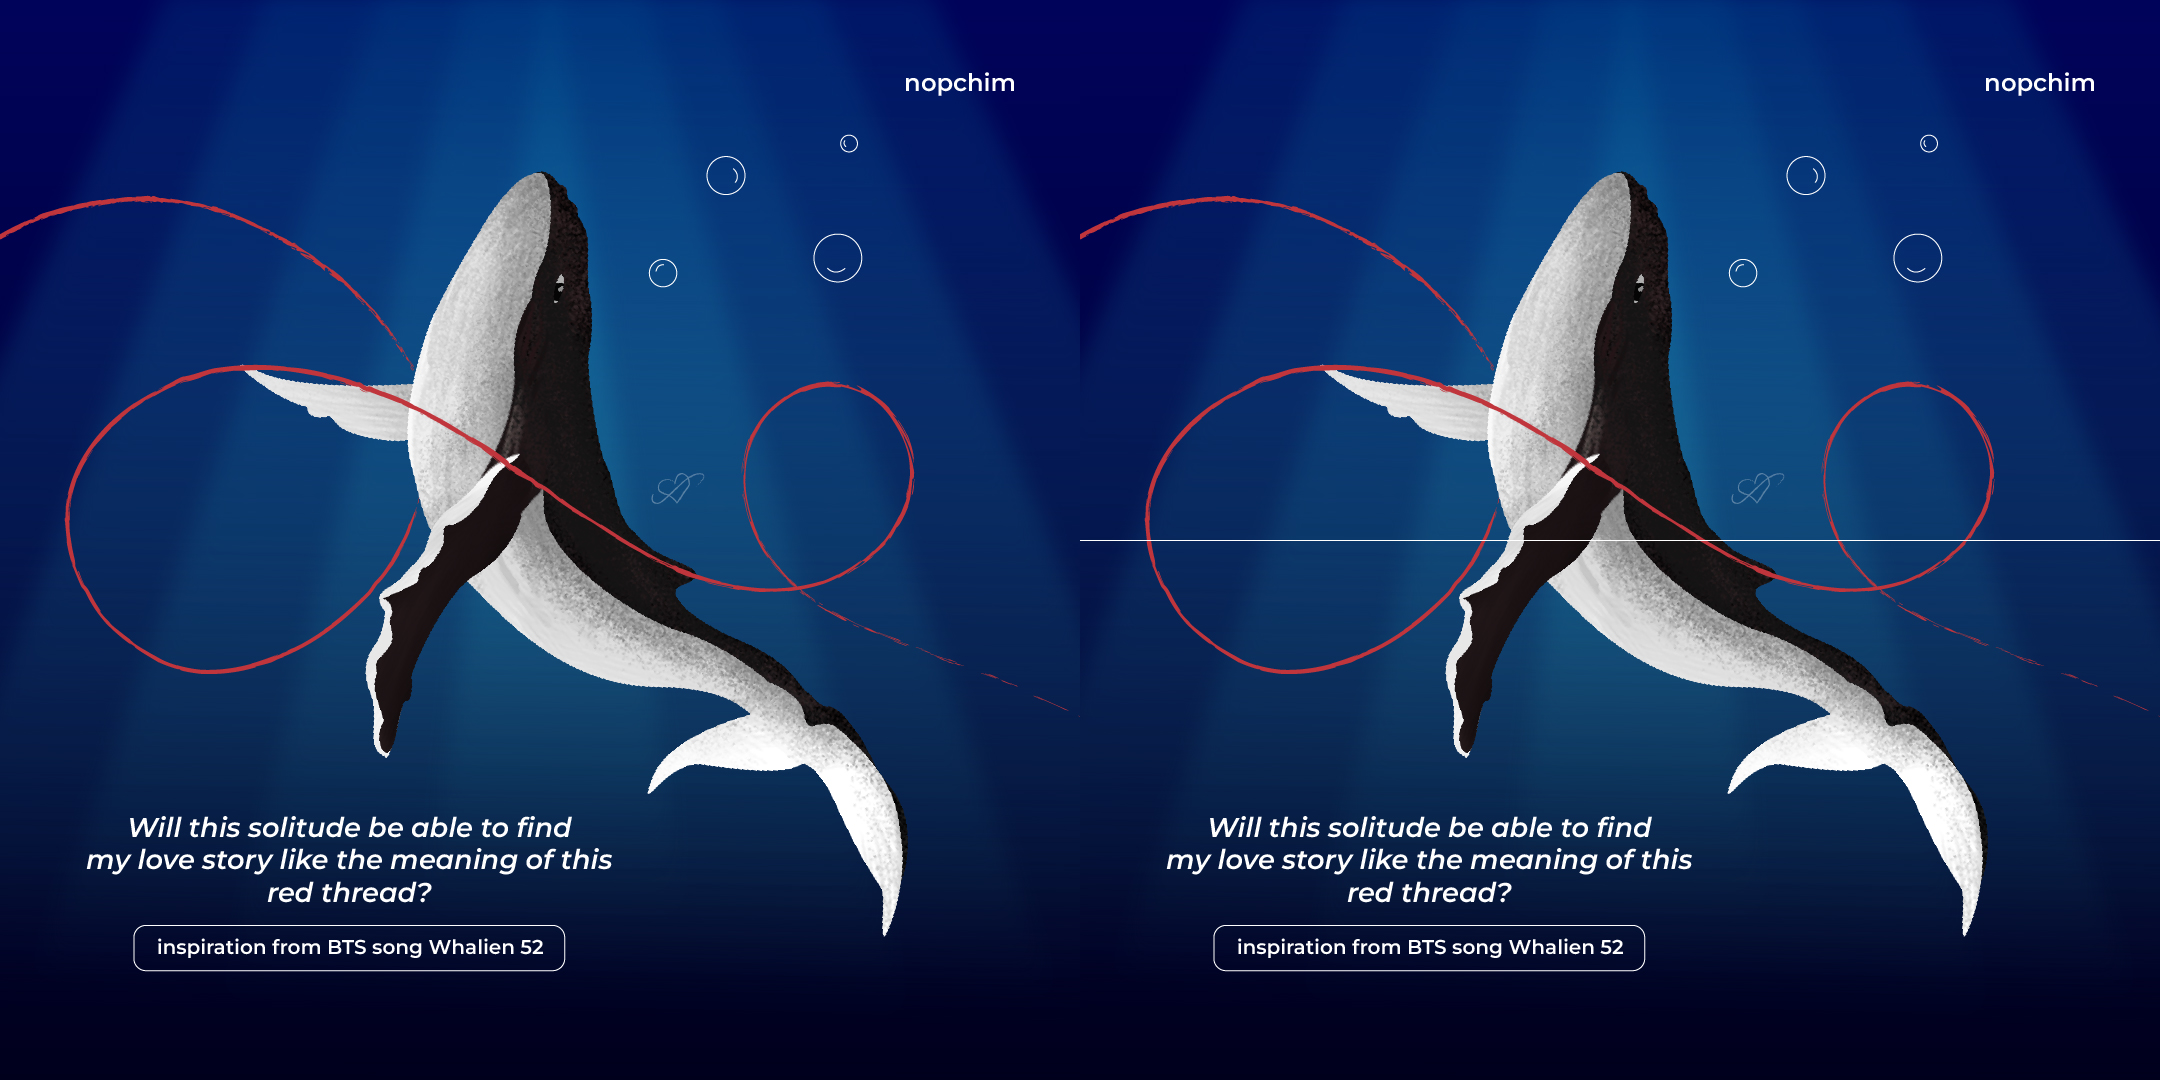

In [28]:
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#membuat garis horizontal ditengah image
for y in range (lebar):
  img3[int((tinggi)/2),y] = [255,255,255]

final_frame = cv.hconcat((img2, img3))
cv2_imshow(final_frame)

## KECERAHAN

Kecerahan citra

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 60


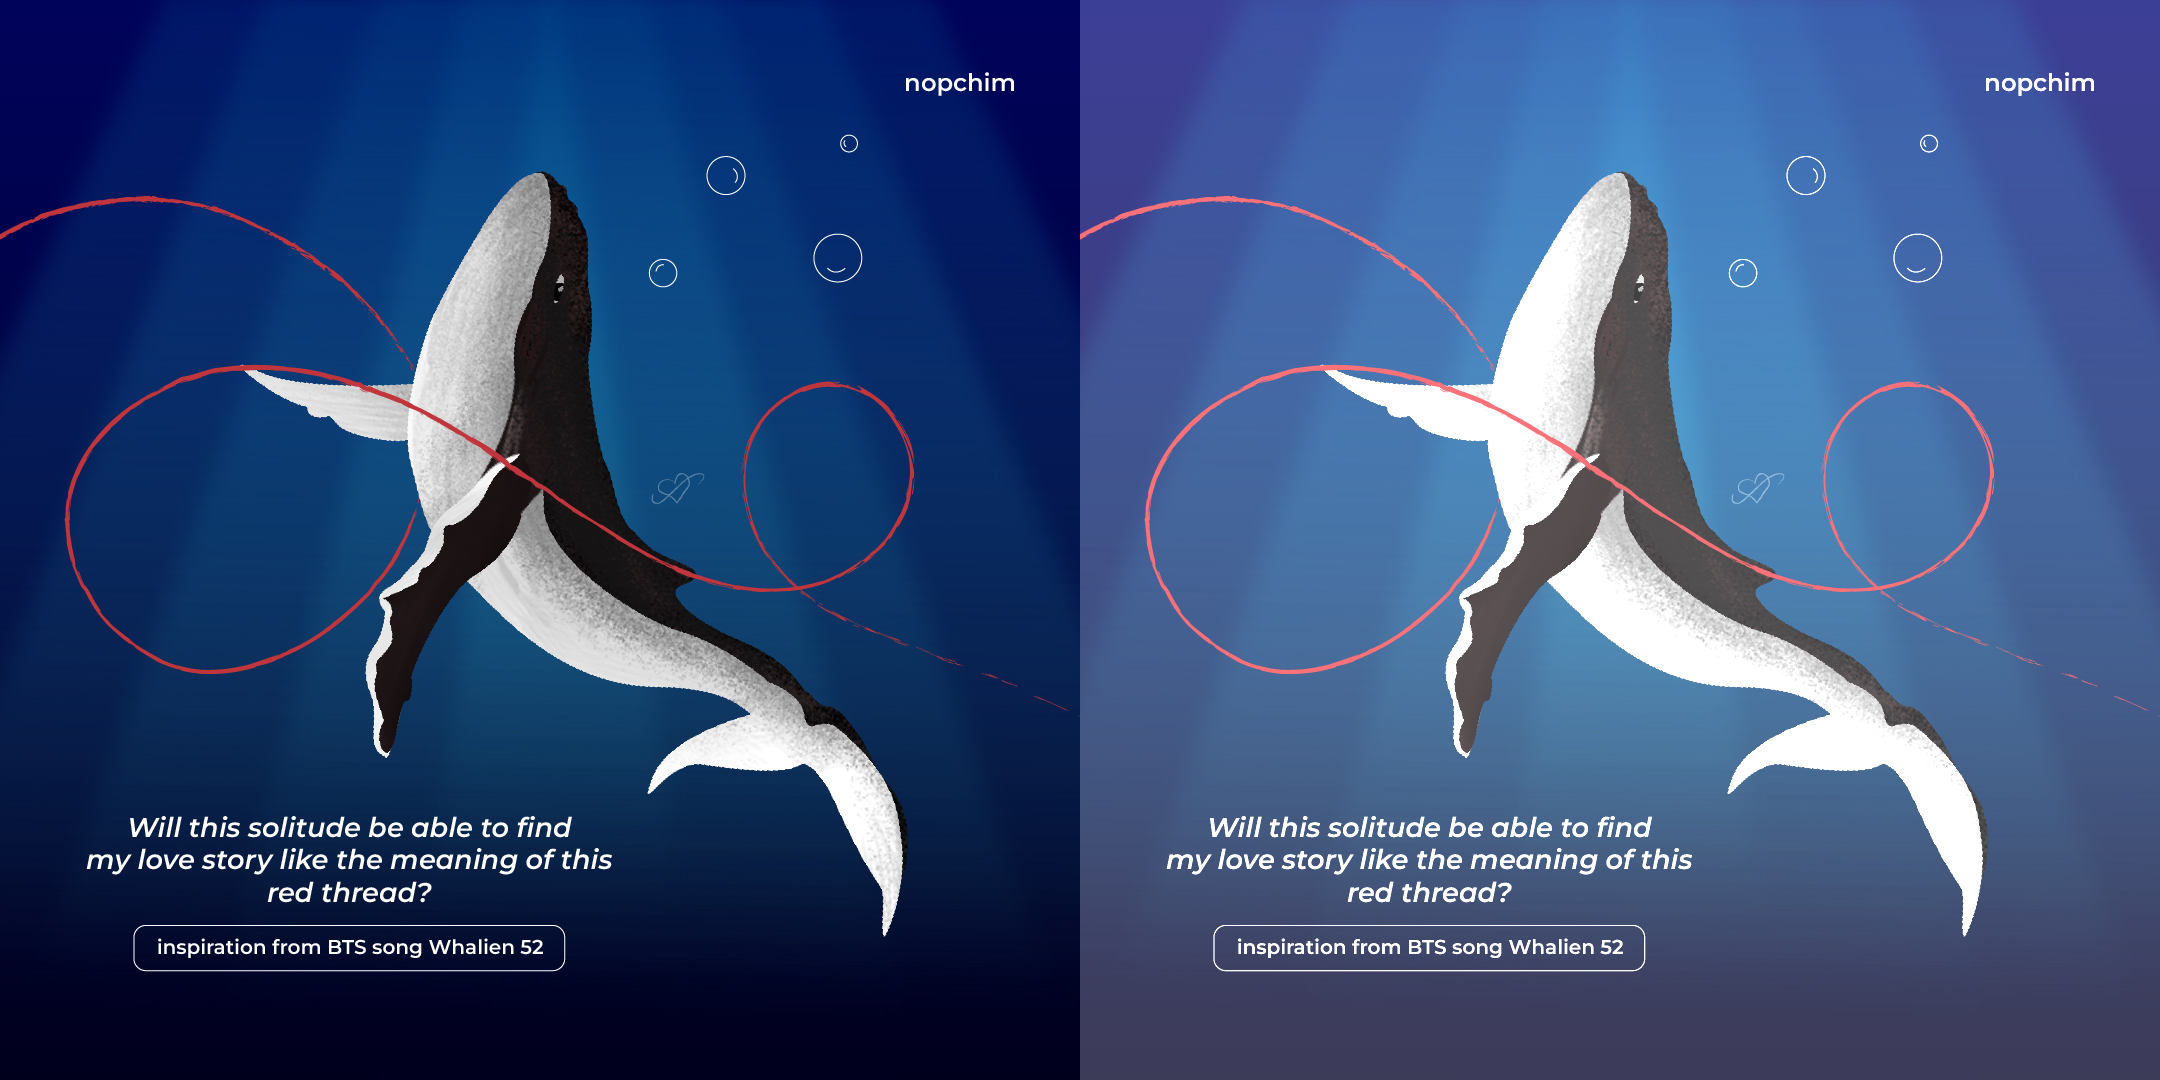

In [3]:
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/whalien.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Kecerahan citra dan kontras

Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan : 50
Masukkan kontras [1.0 - 3.0]: 1.7


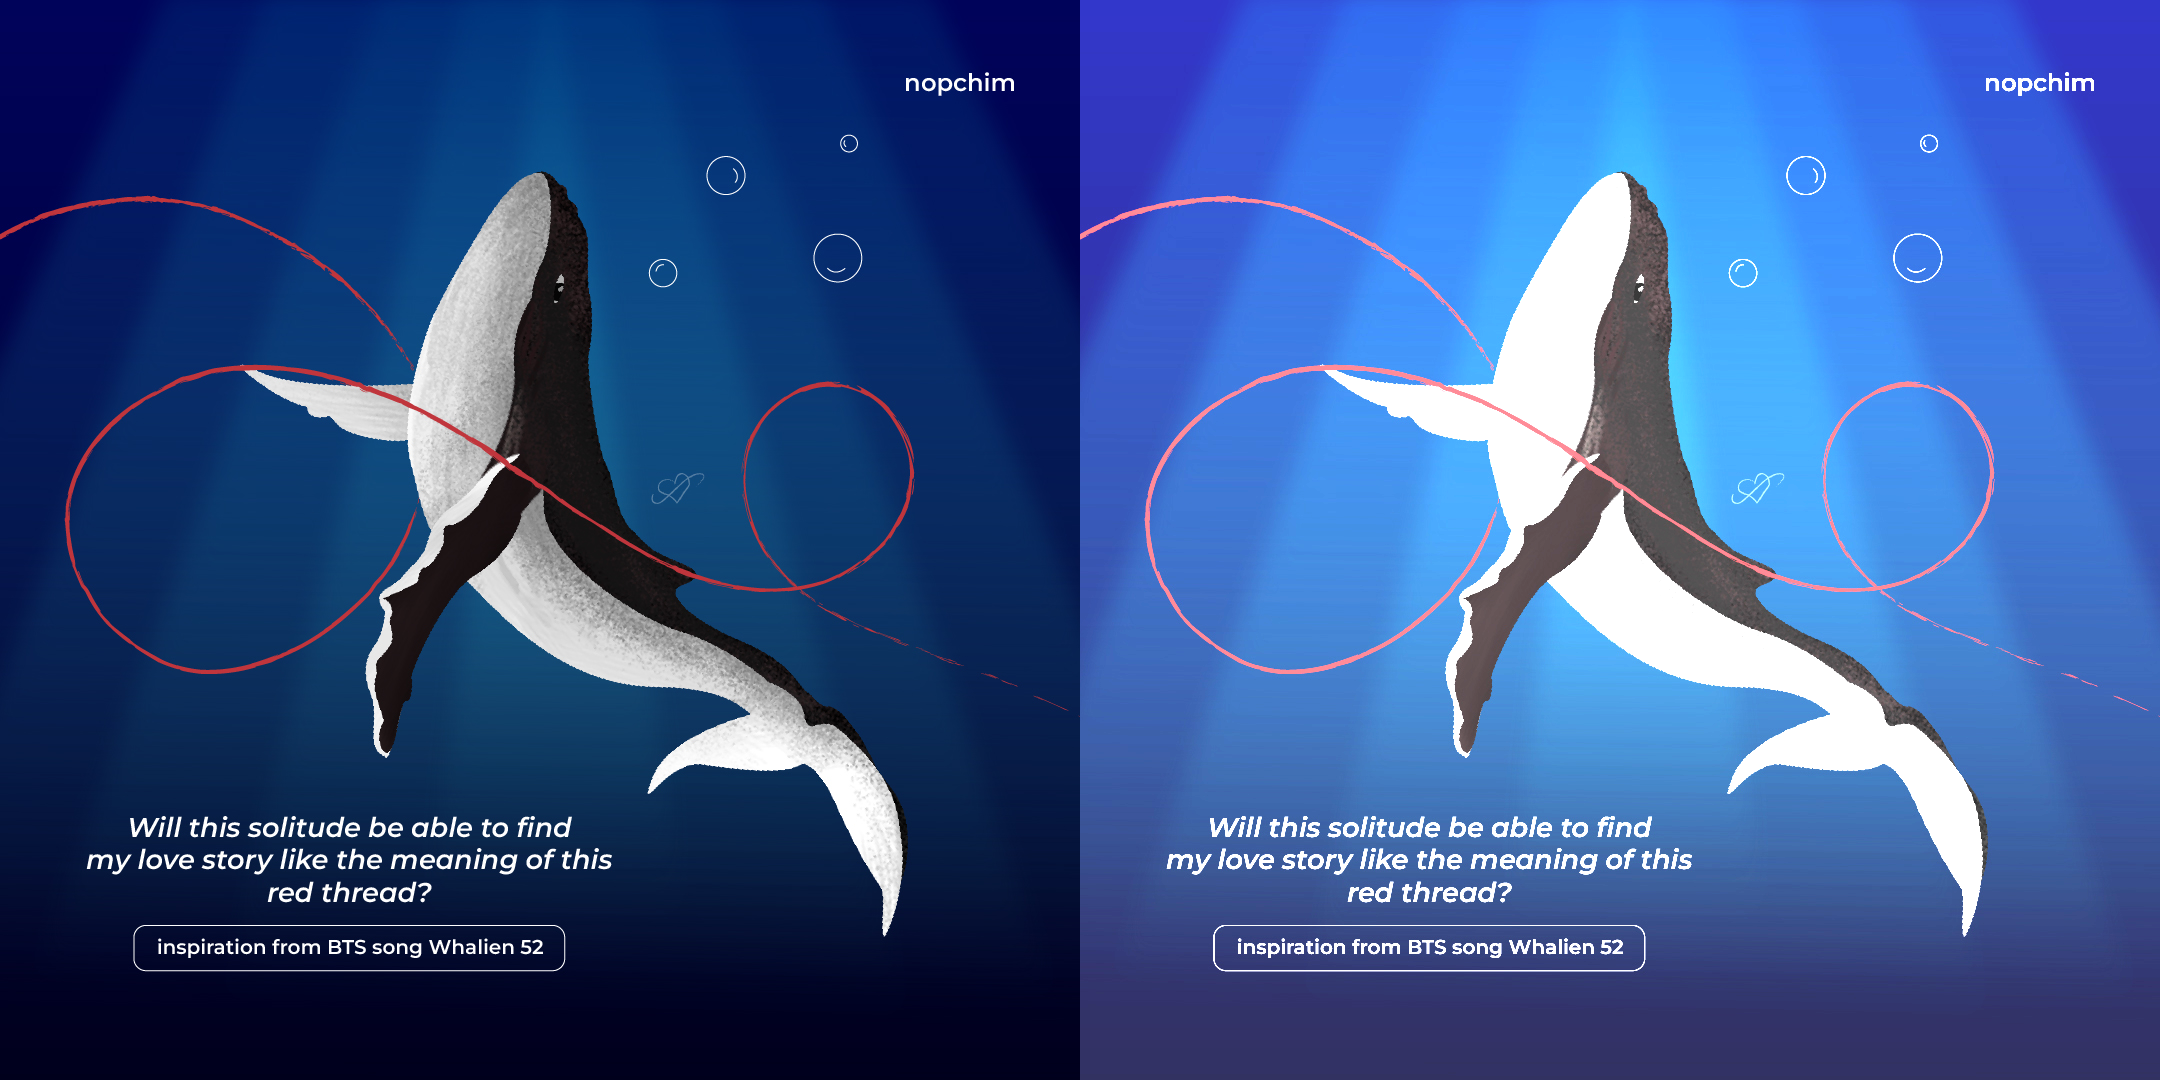

In [4]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan : '))
  kontras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/whalien.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(kontras*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Kecerahan citra dengan Transformasi Log

Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------
Masukkan nilai kecerahan: 40


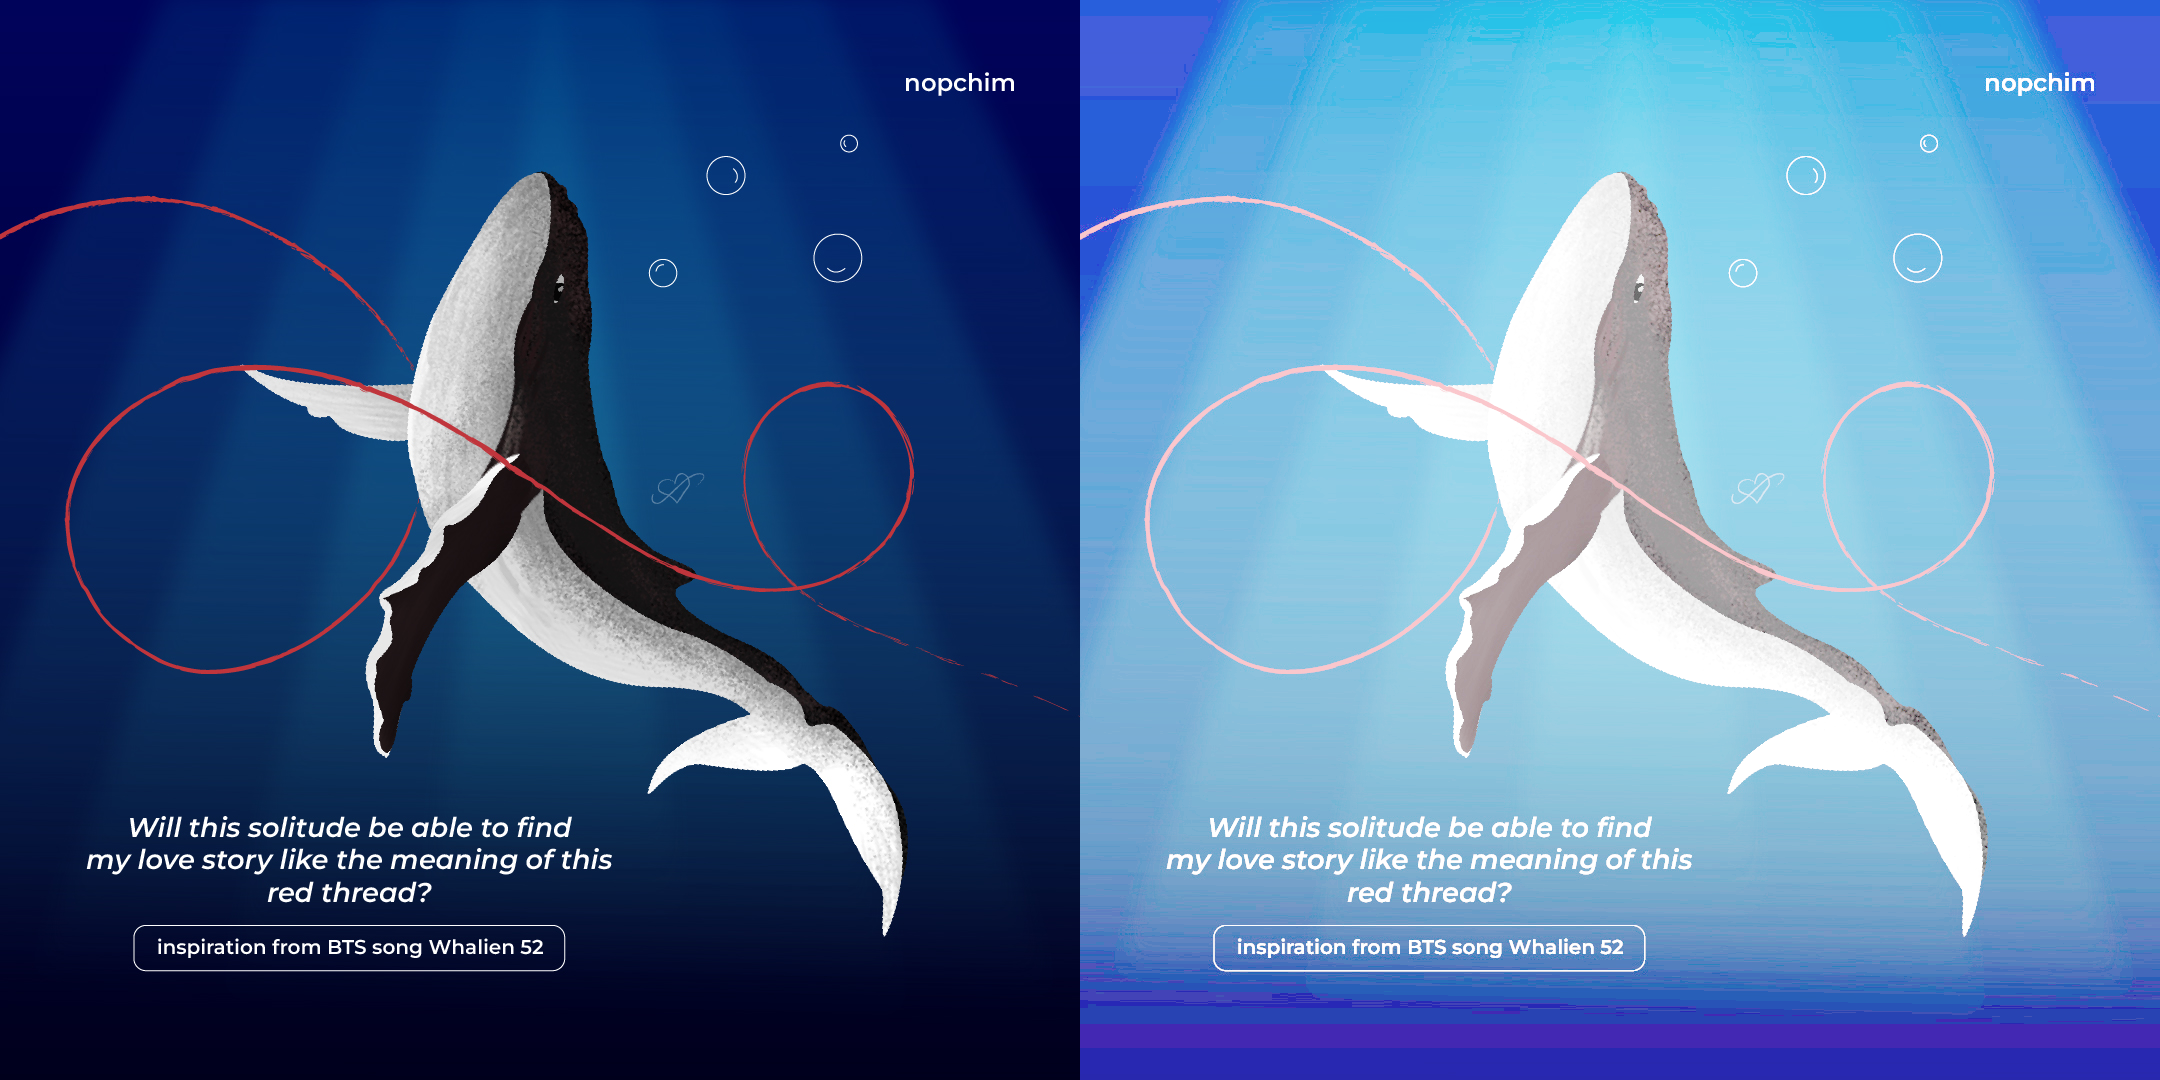

In [5]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/whalien.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])) + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## Image Filter

Fungsi konvolusi

In [39]:
def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  #height dan width dari kernel dan citra padding
  paddingheight, paddingwidth = image.shape
  kernelheight, kernelwidth = kernel.shape

  #menentukan output
  outputheight = (paddingheight - kernelheight) // stride - 1
  outputwidth = (paddingwidth - kernelwidth) // stride - 1

  new_image = np.zeros((outputheight, outputwidth)).astype(np.float32)

  for y in range(0, outputheight):
    for x in range(0, outputwidth):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernelheight, x * stride:x * stride + kernelwidth] * kernel).astype(np.float32)
  return new_image

In [40]:
img = cv.imread('/content/drive/MyDrive/someone.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

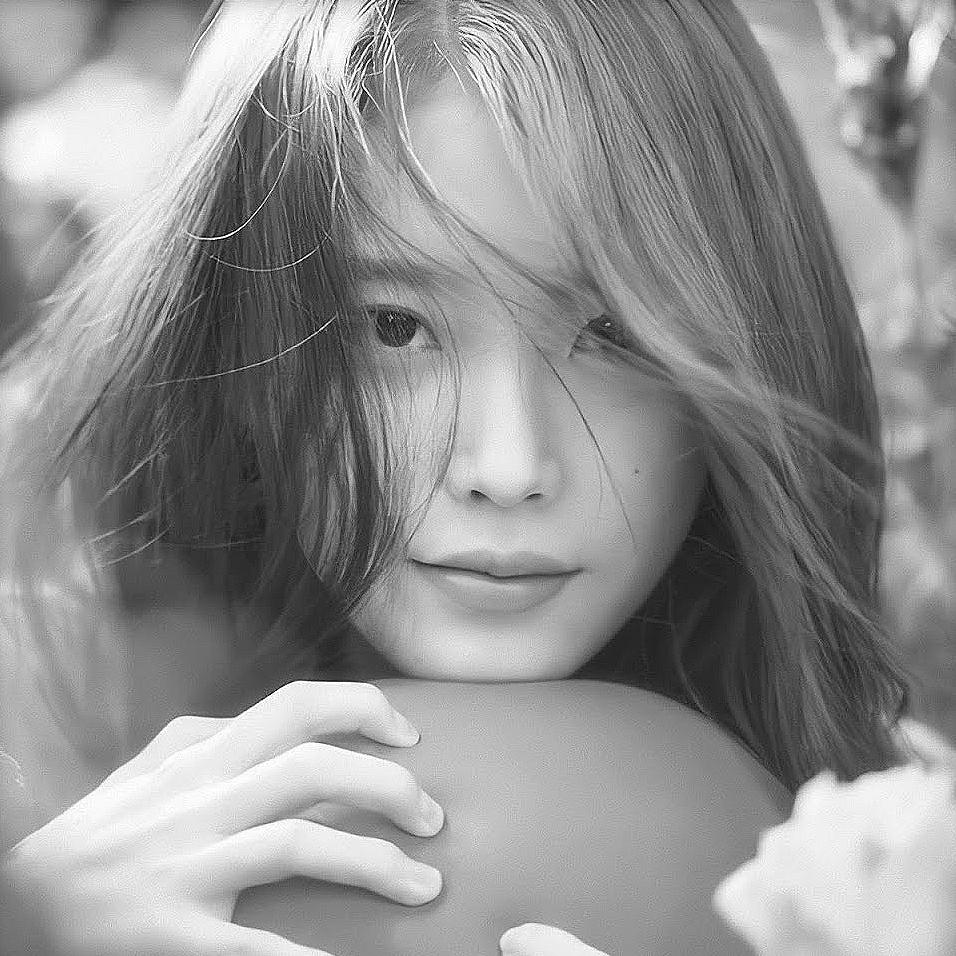

In [41]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen,1,0))

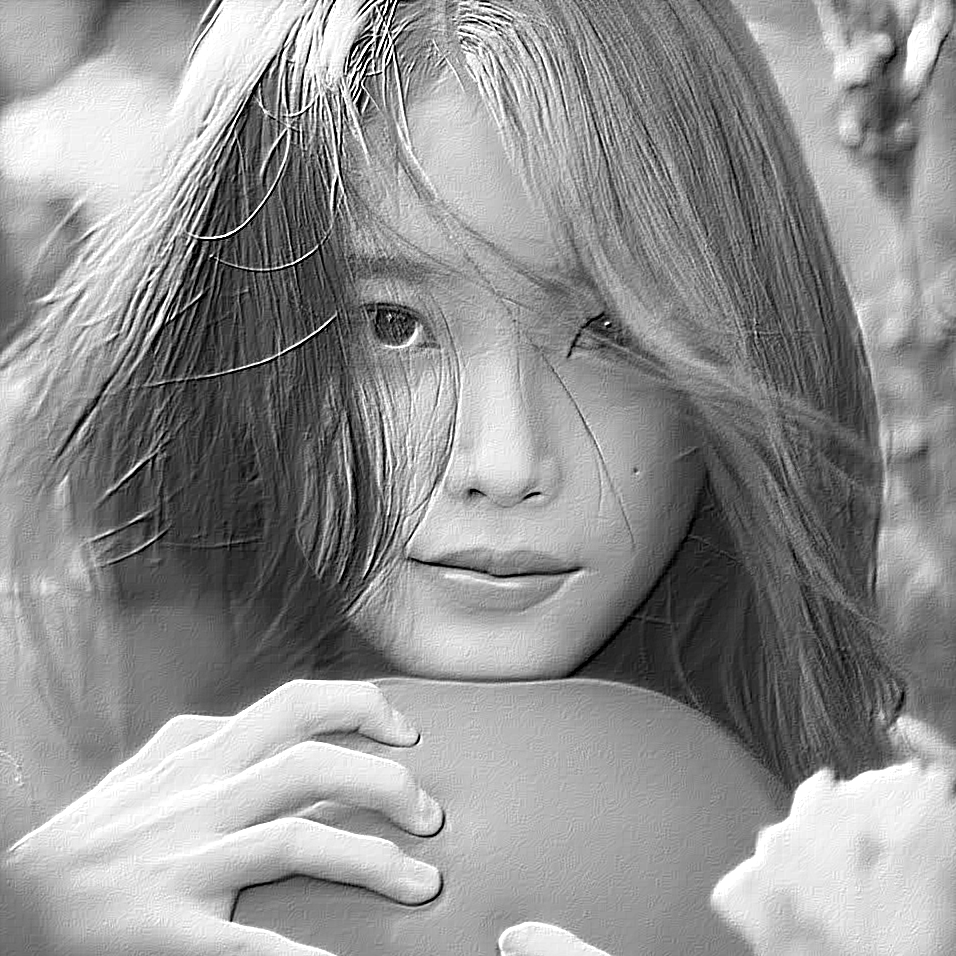

In [42]:
emboss = np.array([[-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, emboss,1,0))

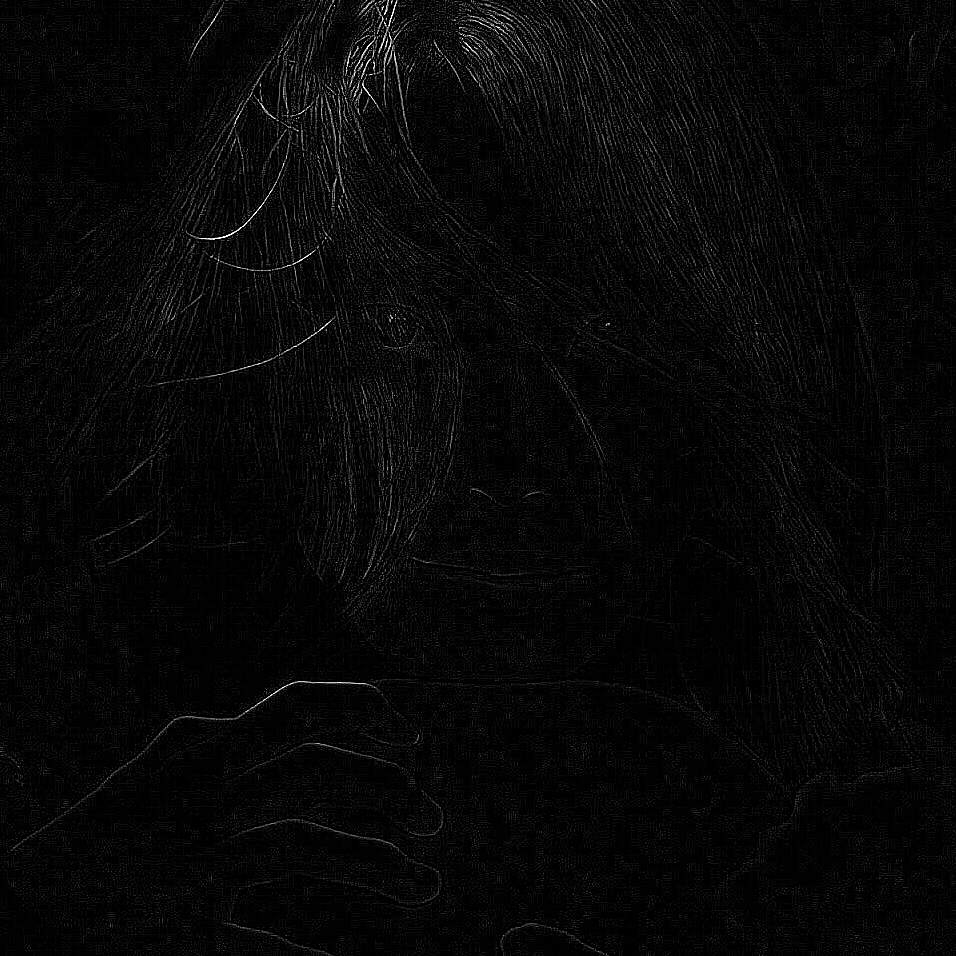

In [43]:
cannyedgedetection = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
cv2_imshow(convolution2d(img_gray, cannyedgedetection,1,0))

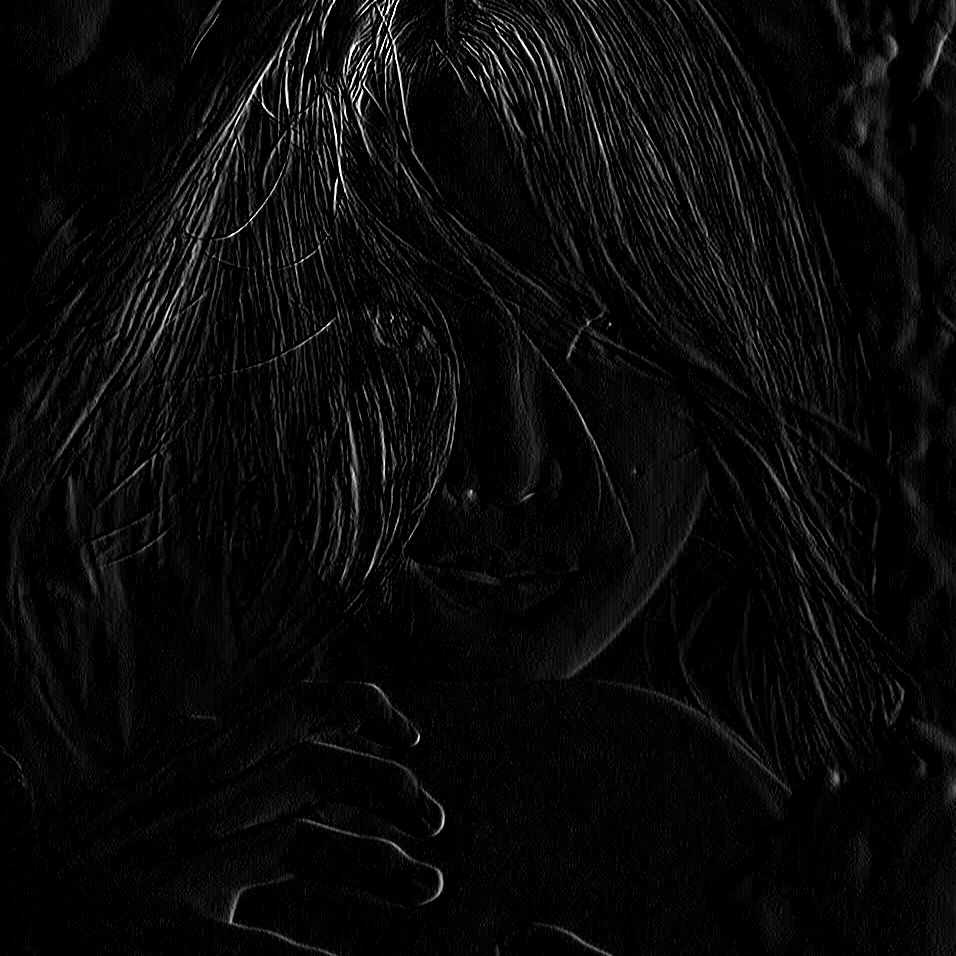

In [44]:
leftsobeledgedetection = np.array([[1, 0, -1],
                                  [2, 0, -2],
                                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, leftsobeledgedetection,1,0))

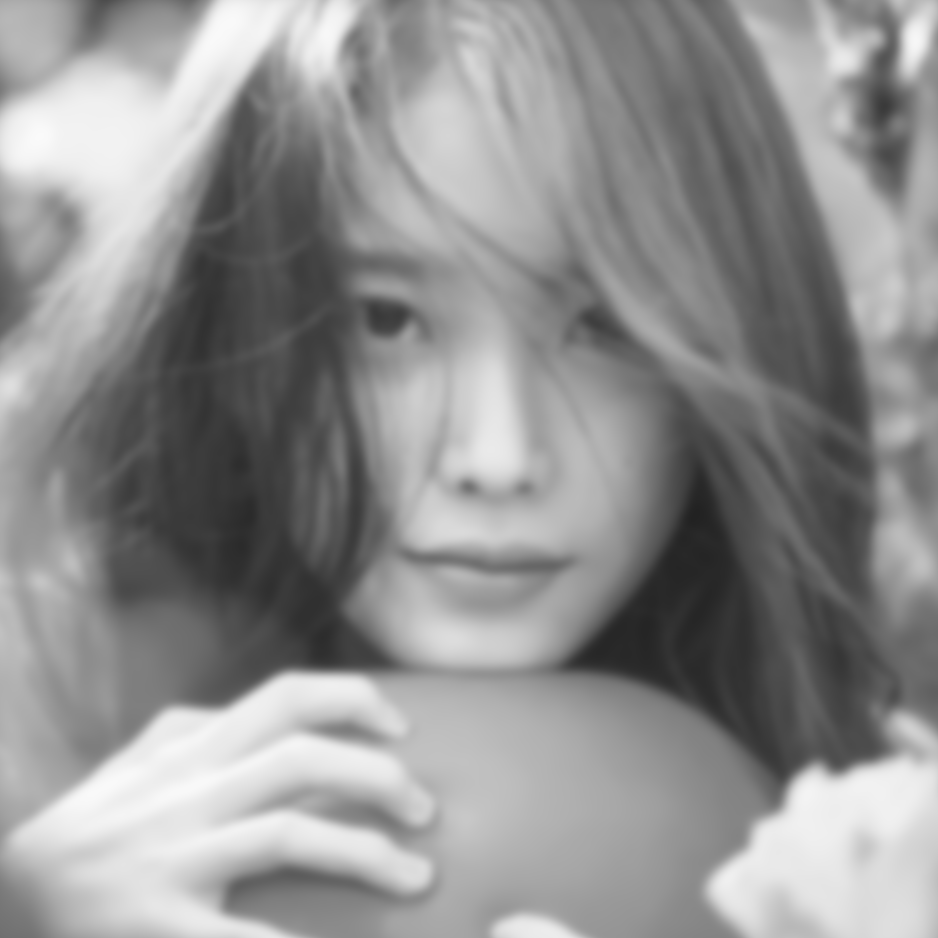

In [49]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @gaussian_kernel.transpose()
cv2_imshow(convolution2d(img_gray, gauss_kernel,1,0))